In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

##### The tech stocks we'll use for this analysis

In [6]:
company_list = ['AAPL.csv', 'GOOGl.csv', 'MSFT.csv', 'AMZN.csv']

# Blank dataframe
all_data = pd.DataFrame()

for file_name in company_list:
    current_df = pd.read_csv(file_name)
    # Add a 'Source' column with the name of the current dataframe
    current_df['Source'] = file_name[:-4]  # Remove the '.csv' extension from the filename
    all_data = pd.concat([all_data, current_df], ignore_index=True)
    
print(all_data.shape)

(1004, 8)


In [10]:
all_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
1  2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2  2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
3  2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
4  2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

      Volume Source  
0  109742900   AAPL  
1  136095600   AAPL  
2  137426100   AAPL  
3  117726300   AAPL  
4  104132700   AAPL

In [11]:
all_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Source        object
dtype: object

In [13]:
all_data['Date']=pd.to_datetime(all_data['Date'])

In [15]:
all_data['Date'][0]

Timestamp('2022-05-18 00:00:00')

In [16]:
all_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Source'],
      dtype='object')

##### Analyse closing price of all the stocks

In [19]:
tech_list = all_data['Source'].unique()

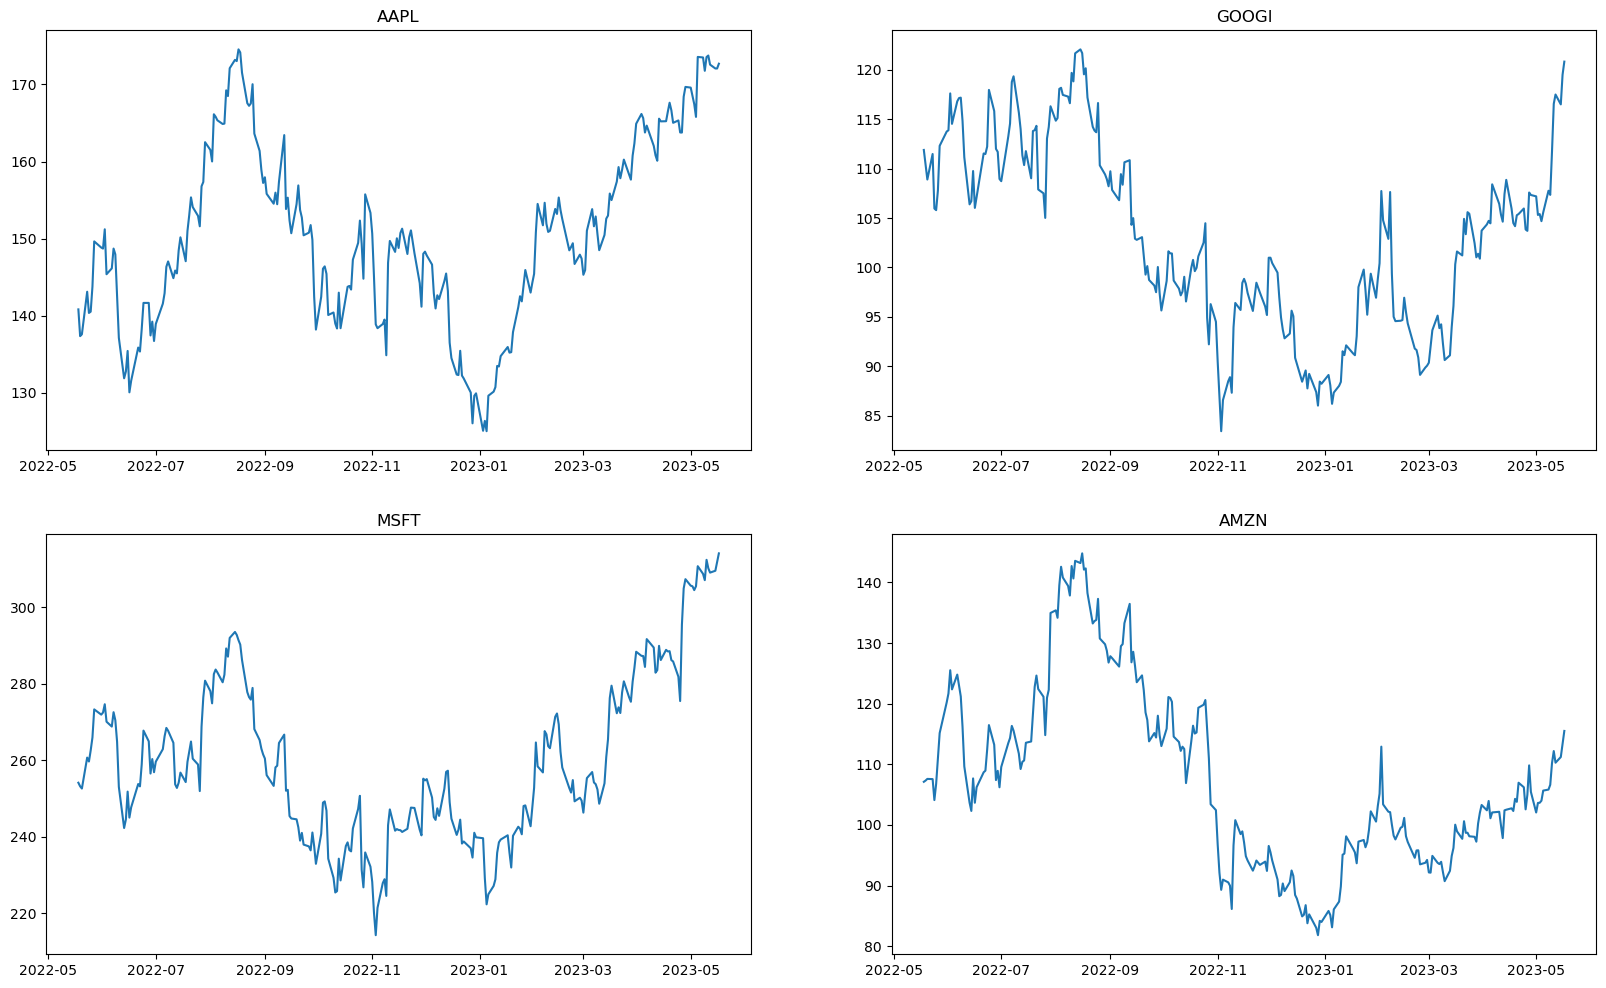

In [20]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Source']==company]
    plt.plot(df['Date'],df['Close'])
    plt.title(company)

    

##### let's analyse the total volume of stock being traded each day

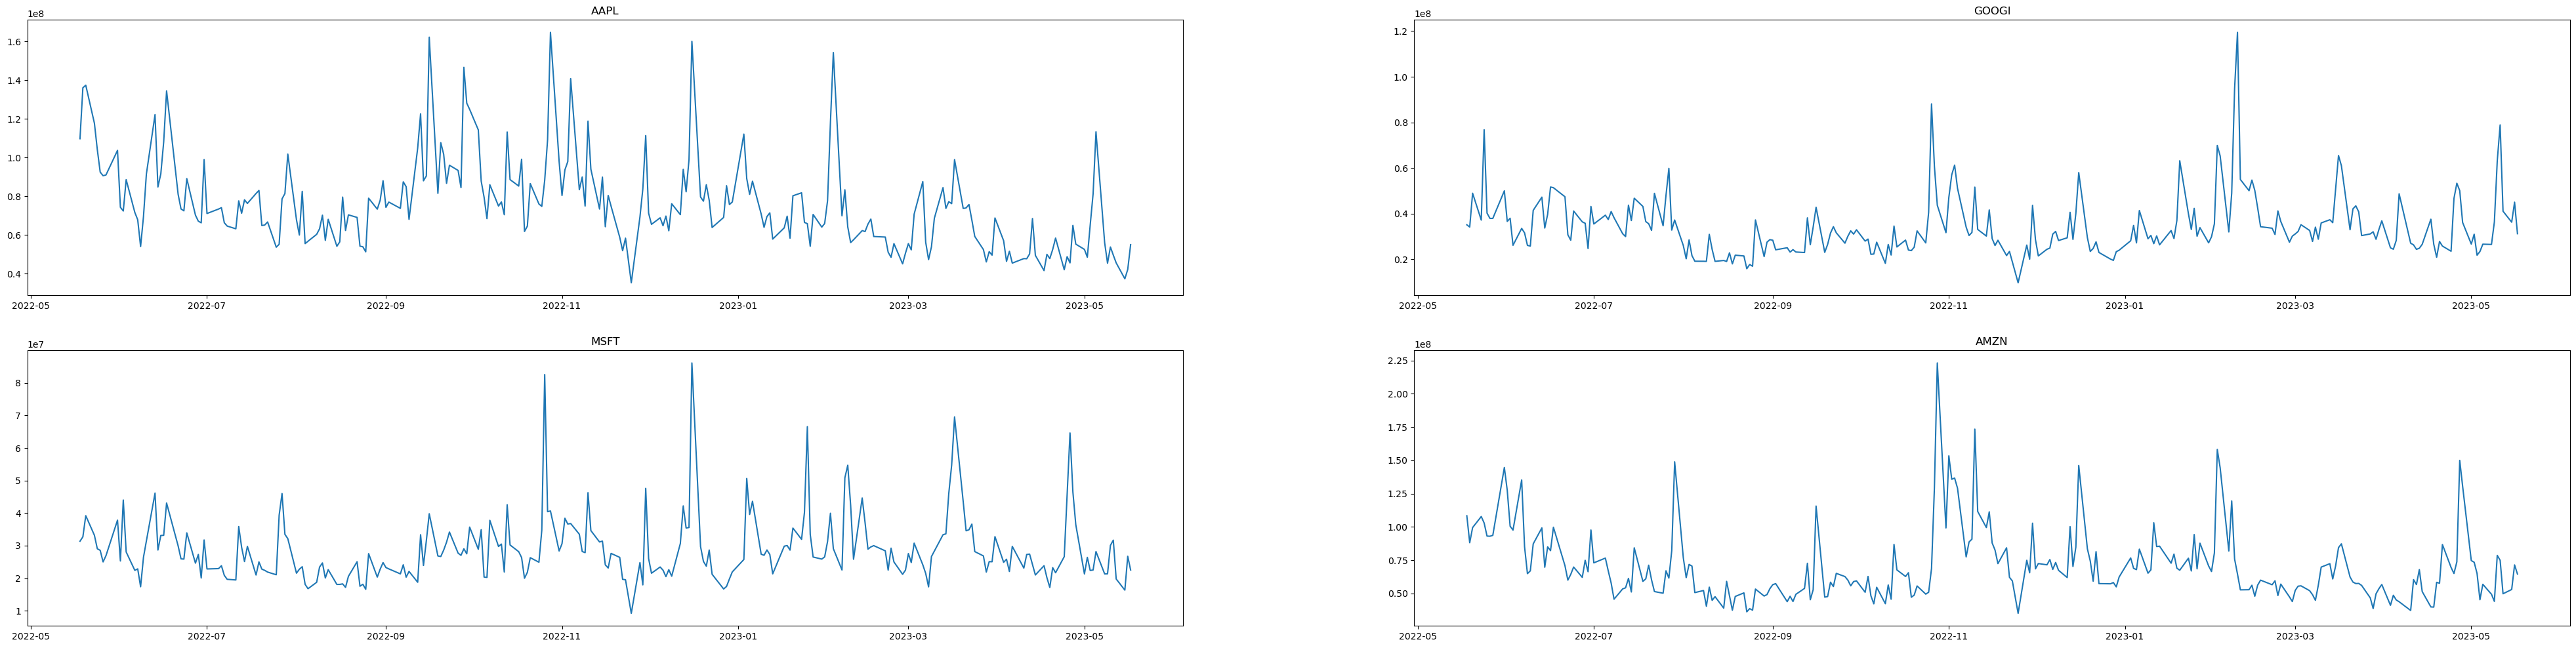

In [25]:
plt.figure(figsize=(50,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Source']==company]
    plt.plot(df['Date'],df['Volume'])
    plt.title(company)


##### using plotly

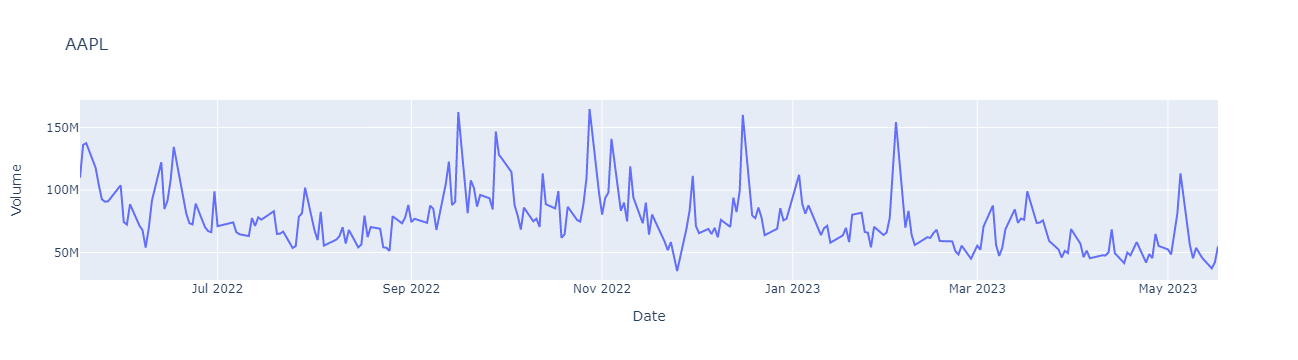

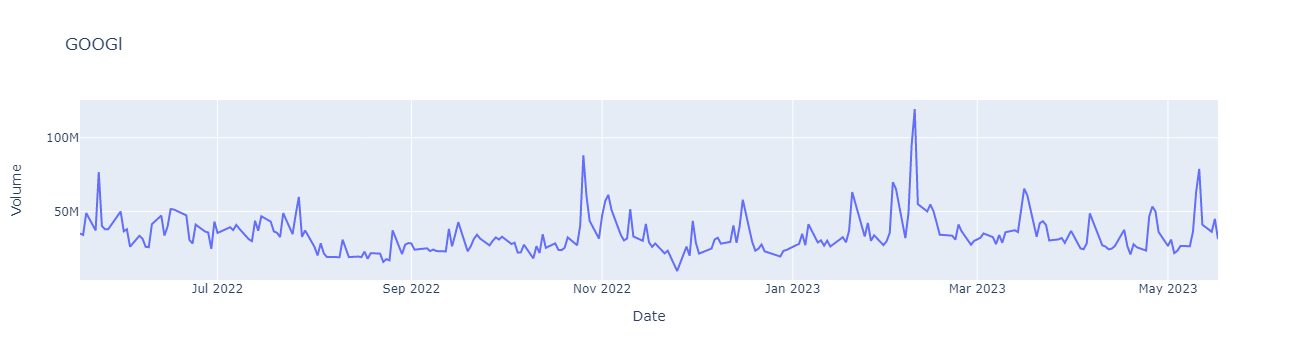

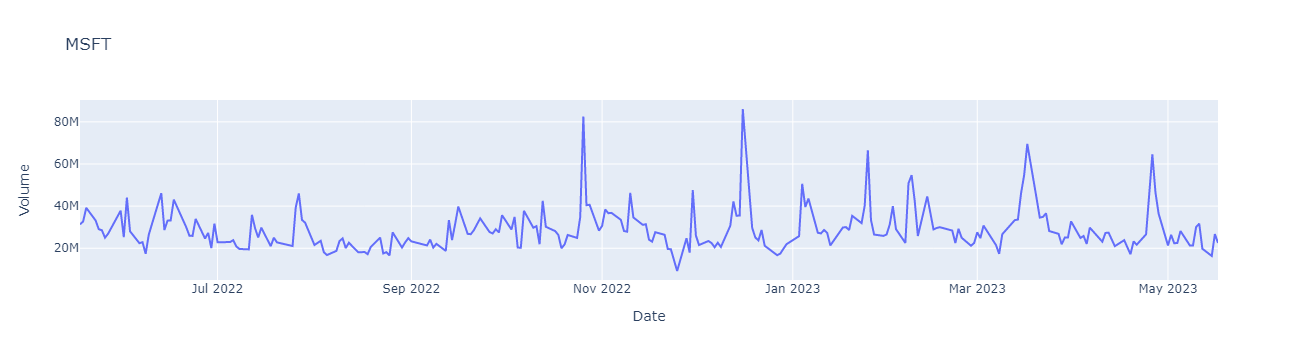

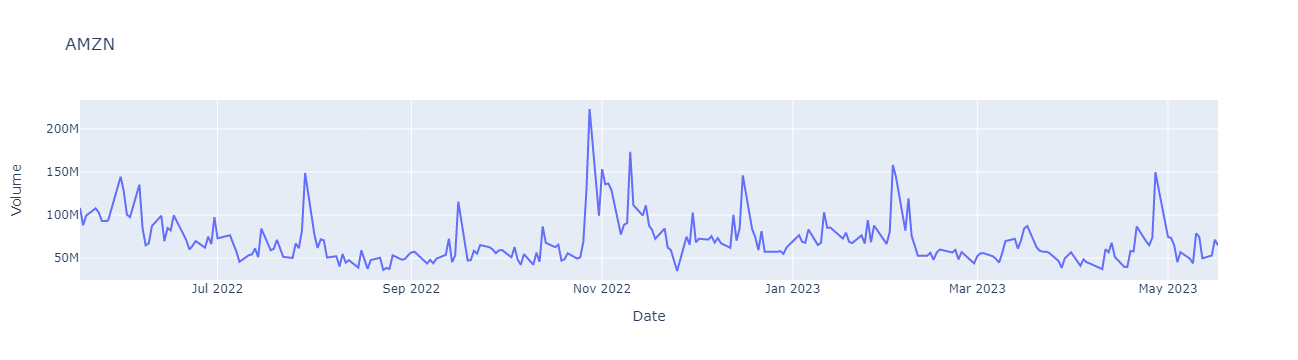

In [28]:

for company in (tech_list):
    df=all_data[all_data['Source']==company]
    fig = px.line(df, x="Date", y="Volume", title=company)
    fig.show()

In [29]:
all_data['Source'].unique()

array(['AAPL', 'GOOGl', 'MSFT', 'AMZN'], dtype=object)

##### analyse Daily price change in stock

##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [30]:
df=pd.read_csv('AAPL.csv')
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
1  2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2  2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
3  2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
4  2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

      Volume  
0  109742900  
1  136095600  
2  137426100  
3  117726300  
4  104132700

##### percentage return

In [31]:
df['1Day % Return']=((df['Close']-df['Open'])/df['Close'])*100
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
1  2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2  2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
3  2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
4  2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

      Volume  1Day % Return  
0  109742900      -4.282061  
1  136095600      -1.842009  
2  137426100      -1.090196  
3  117726300       3.717426  
4  104132700      -0.320602

In [32]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '1Day % Return'],
      dtype='object')

##### using plotly to visualise data

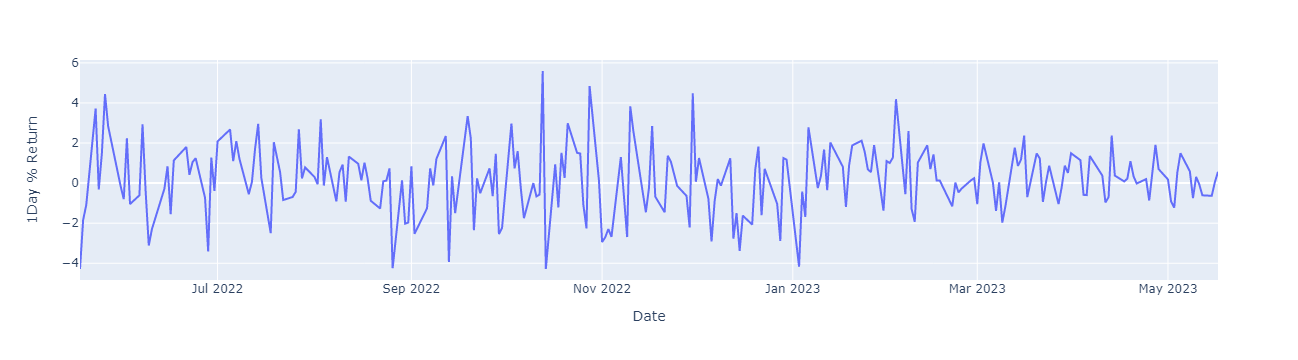

In [33]:
import plotly.express as px
fig = px.line(df, x="Date", y="1Day % Return", title='')
fig.show()

##### using matplotlib for visualisation

<Axes: >

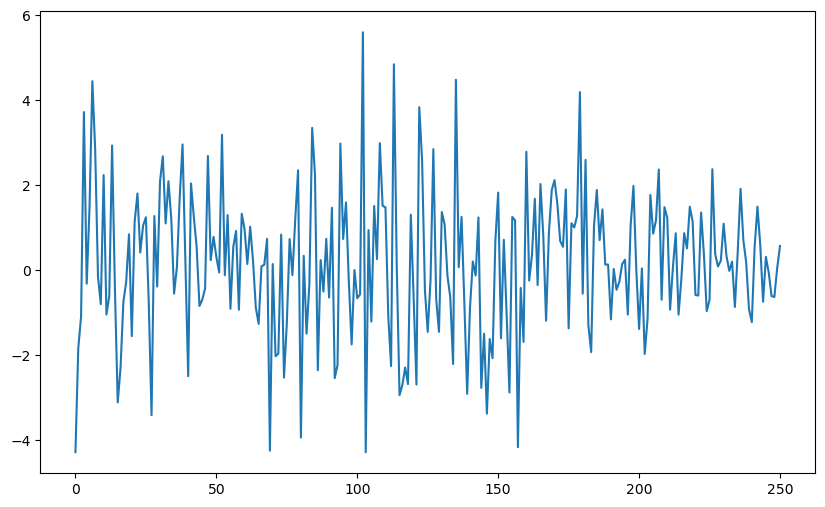

In [34]:
plt.figure(figsize=(10,6))
df['1Day % Return'].plot()

#### lets say between some interval

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2023-05-04'),
  Text(0.0, 0, '2023-02-17'),
  Text(10.0, 0, '2023-03-06'),
  Text(20.0, 0, '2023-03-20'),
  Text(30.0, 0, '2023-04-03'),
  Text(40.0, 0, '2023-04-18'),
  Text(50.0, 0, '2023-05-02'),
  Text(60.0, 0, '2023-05-16'),
  Text(70.0, 0, '')])

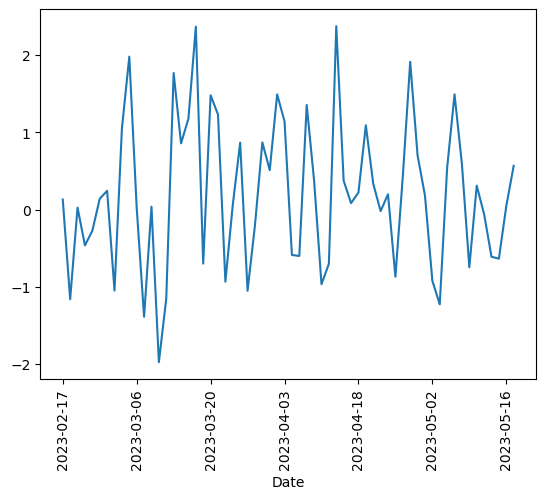

In [35]:
df.set_index('Date')['2023-02-17':'2023-05-17']['1Day % Return'].plot()
plt.xticks(rotation='vertical')

#### Analyse monthly mean of close column

In [36]:
df2=df.copy()

In [37]:
df2['Date']=pd.to_datetime(df2['Date'])

In [38]:
df2.set_index('Date',inplace=True)

In [39]:
df2.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

               Volume  1Day % Return  
Date                                  
2022-05-18  109742900      -4.282061  
2022-05-19  136095600      -1.842009  
2022-05-20  137426100      -1.090196  
2022-05-23  117726300       3.717426  
2022-05-24  104132700      -0.320602

<Axes: xlabel='Date'>

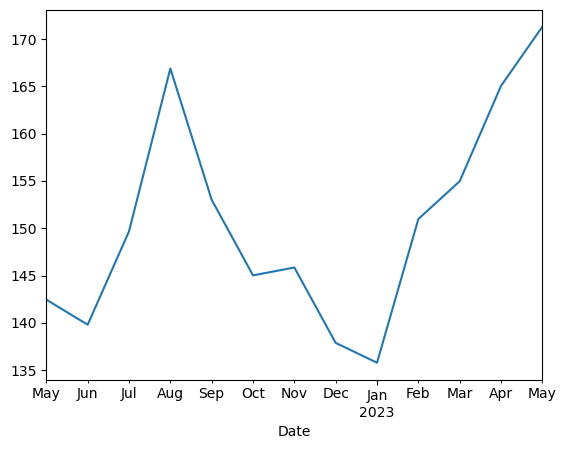

In [40]:
df2['Close'].resample('M').mean().plot()

##### resampling close column year wise

<Axes: xlabel='Date'>

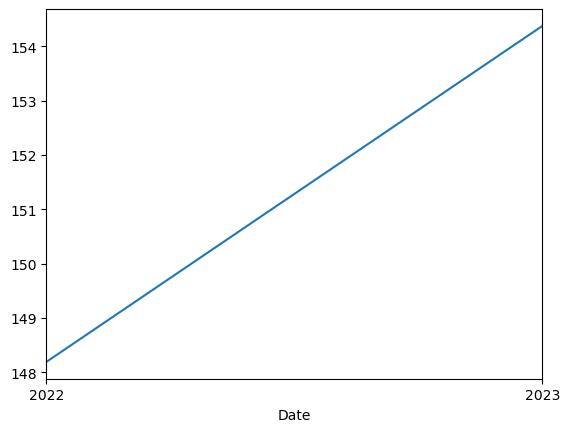

In [41]:
df2['Close'].resample('Y').mean().plot()

##### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [42]:
df2.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

               Volume  1Day % Return  
Date                                  
2022-05-18  109742900      -4.282061  
2022-05-19  136095600      -1.842009  
2022-05-20  137426100      -1.090196  
2022-05-23  117726300       3.717426  
2022-05-24  104132700      -0.320602

##### reading data of tech companies

In [43]:
aapl=pd.read_csv('AAPL.csv')
aapl.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
1  2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2  2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
3  2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
4  2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

      Volume  
0  109742900  
1  136095600  
2  137426100  
3  117726300  
4  104132700

In [45]:
googl=pd.read_csv('GOOGl.csv')
googl.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  115.000000  115.400002  111.555496  111.899498  111.899498   
1  2022-05-19  111.431503  113.010002  110.000000  110.384003  110.384003   
2  2022-05-20  111.950996  112.183502  105.796501  108.907997  108.907997   
3  2022-05-23  109.587502  112.147499  108.740997  111.487999  111.487999   
4  2022-05-24  105.772003  106.458504  101.884499  105.970001  105.970001   

     Volume  
0  35126000  
1  34144000  
2  48962000  
3  37184000  
4  76780000

In [46]:
amzn=pd.read_csv('AMZN.csv')
amzn.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  111.439499  112.852997  106.249001  107.112503  107.112503   
1  2022-05-19  106.280502  110.033997  106.193001  107.319000  107.319000   
2  2022-05-20  109.568497  109.898003  105.009499  107.591003  107.591003   
3  2022-05-23  108.460999  108.819000  103.949997  107.556999  107.556999   
4  2022-05-24  104.025002  105.400002  101.260002  104.099998  104.099998   

      Volume  
0  108380000  
1   88142000  
2   99500000  
3  107798000  
4  102934000

In [47]:
msft=pd.read_csv('MSFT.csv')
msft.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  263.000000  263.600006  252.770004  254.080002  252.197632   
1  2022-05-19  253.899994  257.670013  251.880005  253.139999  251.264603   
2  2022-05-20  257.239990  258.540009  246.440002  252.559998  250.688889   
3  2022-05-23  255.490005  261.500000  253.429993  260.649994  258.718933   
4  2022-05-24  257.890015  261.329987  253.500000  259.619995  257.696594   

     Volume  
0  31356000  
1  32692300  
2  39199300  
3  33175400  
4  29043900

In [52]:
### create a blank dataframe
close=pd.DataFrame()

In [53]:
close['aapl']=aapl['Close']
close['goog']=googl['Close']
close['amzn']=amzn['Close']
close['msft']=msft['Close']

In [54]:
close.head()

aapl        goog        amzn        msft
0  140.820007  111.899498  107.112503  254.080002
1  137.350006  110.384003  107.319000  253.139999
2  137.589996  108.907997  107.591003  252.559998
3  143.110001  111.487999  107.556999  260.649994
4  140.360001  105.970001  104.099998  259.619995

#### Multi-variate Analysis

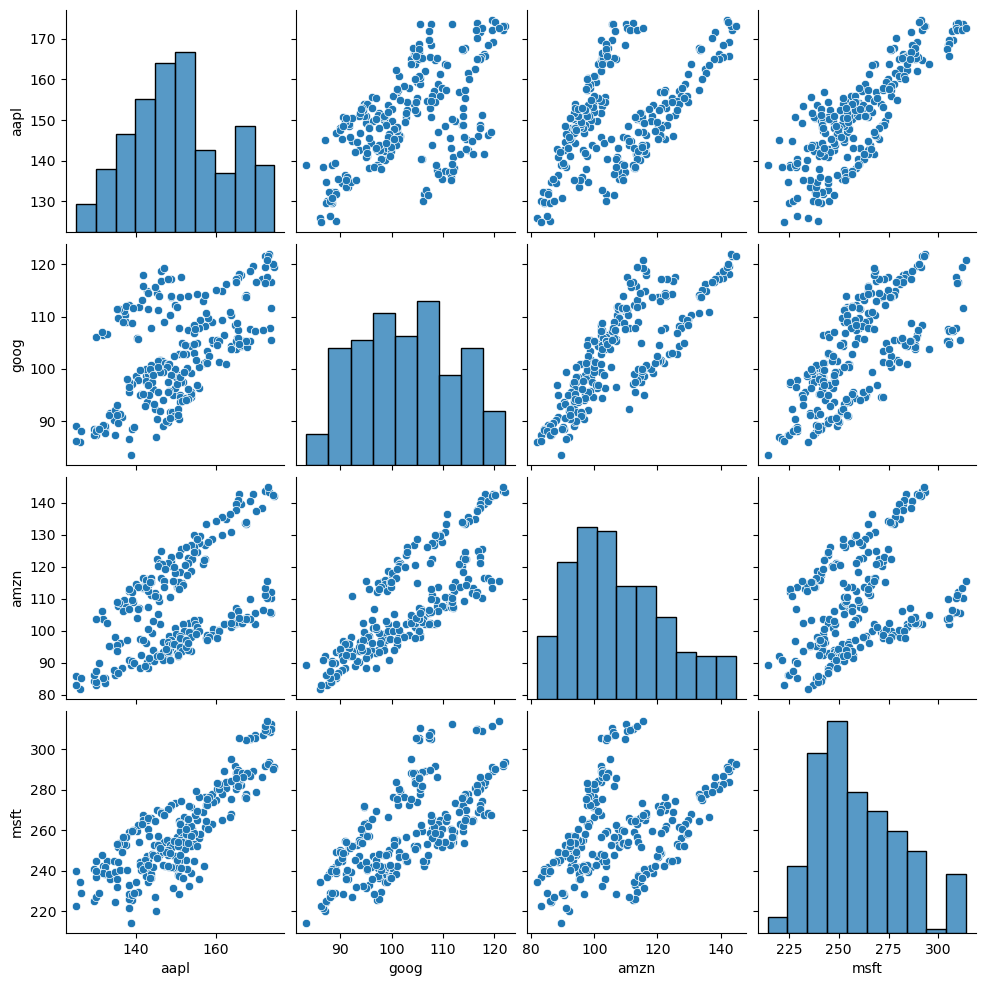

In [55]:
sns.pairplot(data=close)

##### co-relation plot for stock prices 

<Axes: >

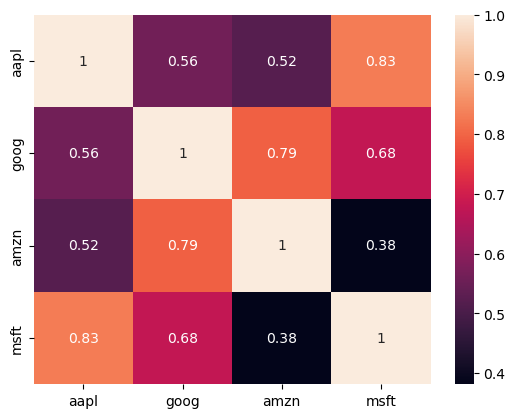

In [56]:
sns.heatmap(close.corr(),annot=True)

###### Closing price of Google and Microsoft are well correlated
       and Closing price of Amazon and Microsoft have a co-relation of 0.96

##### Analyse Daily return of each stock & how they are co-related

In [57]:
data=pd.DataFrame()

In [58]:
aapl.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-05-18  146.850006  147.360001  139.899994  140.820007  139.984131   
1  2022-05-19  139.880005  141.660004  136.600006  137.350006  136.534729   
2  2022-05-20  139.089996  140.699997  132.610001  137.589996  136.773285   
3  2022-05-23  137.789993  143.259995  137.649994  143.110001  142.260529   
4  2022-05-24  140.809998  141.970001  137.330002  140.360001  139.526855   

      Volume  
0  109742900  
1  136095600  
2  137426100  
3  117726300  
4  104132700

In [61]:
data['appl_change']=((aapl['Close']-aapl['Open'])/aapl['Close'])*100
data['goog_change']=((googl['Close']-googl['Open'])/googl['Close'])*100
data['amzn_change']=((amzn['Close']-amzn['Open'])/amzn['Close'])*100
data['msft_change']=((msft['Close']-msft['Open'])/msft['Close'])*100

In [62]:
data.head()

appl_change  goog_change  amzn_change  msft_change
0    -4.282061    -2.770792    -4.039674    -3.510704
1    -1.842009    -0.948960     0.967674    -0.300227
2    -1.090196    -2.794101    -1.837973    -1.853022
3     3.717426     1.704665    -0.840485     1.979662
4    -0.320602     0.186843     0.072042     0.666351

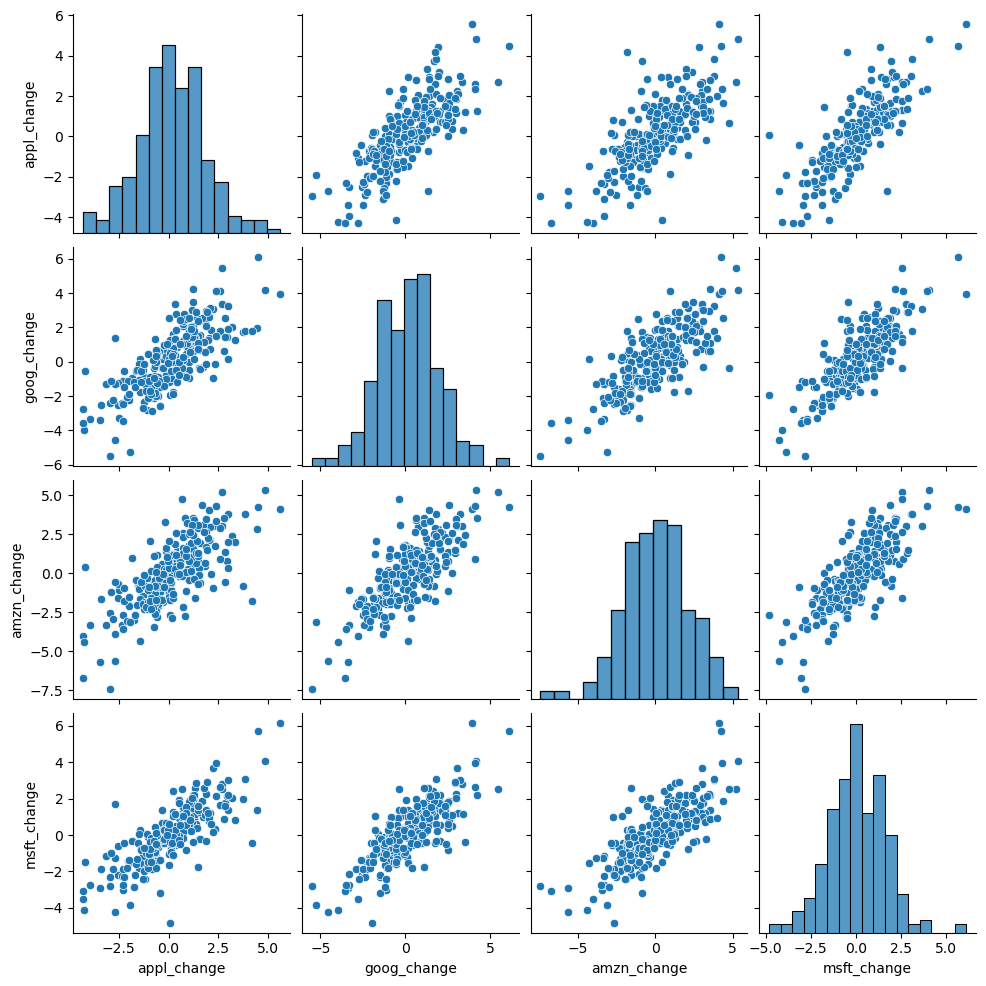

In [63]:
sns.pairplot(data=data)

##### Correlation plot for daily returns

<Axes: >

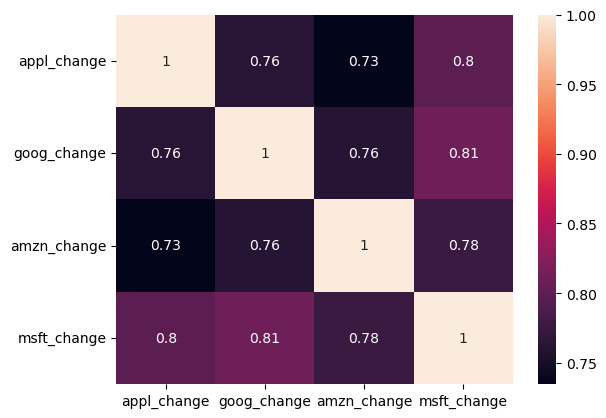

In [64]:
sns.heatmap(data.corr(),annot=True)

##### We can see that Amazon and microsoft have good correlation on daily returns

In [65]:
data.head()

appl_change  goog_change  amzn_change  msft_change
0    -4.282061    -2.770792    -4.039674    -3.510704
1    -1.842009    -0.948960     0.967674    -0.300227
2    -1.090196    -2.794101    -1.837973    -1.853022
3     3.717426     1.704665    -0.840485     1.979662
4    -0.320602     0.186843     0.072042     0.666351

In [66]:
data.columns

Index(['appl_change', 'goog_change', 'amzn_change', 'msft_change'], dtype='object')

In [67]:
type(data)

pandas.core.frame.DataFrame

#### Value at Risk analysis for Apple

<Axes: xlabel='appl_change', ylabel='Density'>

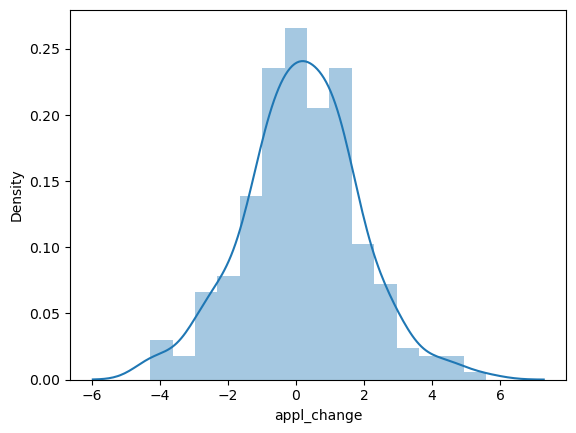

In [69]:
sns.distplot(data['appl_change'])

##### it somehow follows a normal distribution

In [70]:
data['appl_change'].std()

1.6941698346614027

In [71]:
data['appl_change'].quantile(0.1)

-2.026304775626351

##### 2.026304775626351 means that 90% of the times the worst daily Loss will not exceed 2.02

In [72]:
data.describe().T

count      mean       std       min       25%       50%  \
appl_change  251.0  0.161397  1.694170 -4.285296 -0.855367  0.144484   
goog_change  251.0  0.169976  1.819644 -5.504583 -1.102176  0.167123   
amzn_change  251.0  0.028348  2.134527 -7.438782 -1.555171  0.037053   
msft_change  251.0  0.095979  1.619405 -4.813343 -0.882684  0.072733   

                  75%       max  
appl_change  1.234689  5.594797  
goog_change  1.350611  6.109514  
amzn_change  1.395471  5.318634  
msft_change  1.184197  6.143271